In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql

In [1]:
# dataset for practise 
data = {
    'EmployeeID' : [1,2,3,4,5],
    'Department' : ['HR','Finance','IT','HR','It'],
    'Salary': [50000, 60000, 75000, 52000, 70000],
    'HireDate': ['2020-01-15', '2019-11-11', '2018-07-23', '2021-03-01', '2020-09-01'],
    'PerformanceScore': [3.5, 4.2, 3.8, 4.0, 3.9]
}

In [5]:
df = pd.DataFrame(data)
print(df)

   EmployeeID Department  Salary    HireDate  PerformanceScore
0           1         HR   50000  2020-01-15               3.5
1           2    Finance   60000  2019-11-11               4.2
2           3         IT   75000  2018-07-23               3.8
3           4         HR   52000  2021-03-01               4.0
4           5         It   70000  2020-09-01               3.9


In [6]:
# =============================
# 1. Data Exploration
# =============================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        5 non-null      int64  
 1   Department        5 non-null      object 
 2   Salary            5 non-null      int64  
 3   HireDate          5 non-null      object 
 4   PerformanceScore  5 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 332.0+ bytes


In [7]:
df.head()

,EmployeeID,Department,Salary,HireDate,PerformanceScore
0,1,HR,50000,2020-01-15,3.5
1,2,Finance,60000,2019-11-11,4.2
2,3,IT,75000,2018-07-23,3.8
3,4,HR,52000,2021-03-01,4.0
4,5,It,70000,2020-09-01,3.9


In [11]:
# =============================
# 2. Data Cleaning
# =============================

print("\n# Convert HireDate to datetime")

df['HireDate'] = pd.to_datetime(df['HireDate'])
print(df.dtypes)



# Convert HireDate to datetime
EmployeeID                   int64
Department                  object
Salary                       int64
HireDate            datetime64[ns]
PerformanceScore           float64
dtype: object


In [14]:

# =============================
# 3. Exploratory Data Analysis (EDA)
# =============================

# Average salary by department
avg = df.groupby('Department')['Salary'].mean()
print(avg)

Department
Finance    60000.0
HR         51000.0
IT         75000.0
It         70000.0
Name: Salary, dtype: float64


In [15]:
# Employees hired after 2020-01-01

recent_hires = df[df['HireDate'] > '2020-01-01']
print(recent_hires)

   EmployeeID Department  Salary   HireDate  PerformanceScore
0           1         HR   50000 2020-01-15               3.5
3           4         HR   52000 2021-03-01               4.0
4           5         It   70000 2020-09-01               3.9


In [17]:
# Add a HireYear column
df['HireYear']  = df['HireDate'].dt.year
print(df)

   EmployeeID Department  Salary   HireDate  PerformanceScore  HireYear
0           1         HR   50000 2020-01-15               3.5      2020
1           2    Finance   60000 2019-11-11               4.2      2019
2           3         IT   75000 2018-07-23               3.8      2018
3           4         HR   52000 2021-03-01               4.0      2021
4           5         It   70000 2020-09-01               3.9      2020


/var/folders/dh/7tkb0wrj5hv7prffvgw42dmw0000gn/T/ipykernel_32883/316668689.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Department' , y = 'Salary', data = df , palette='viridis')


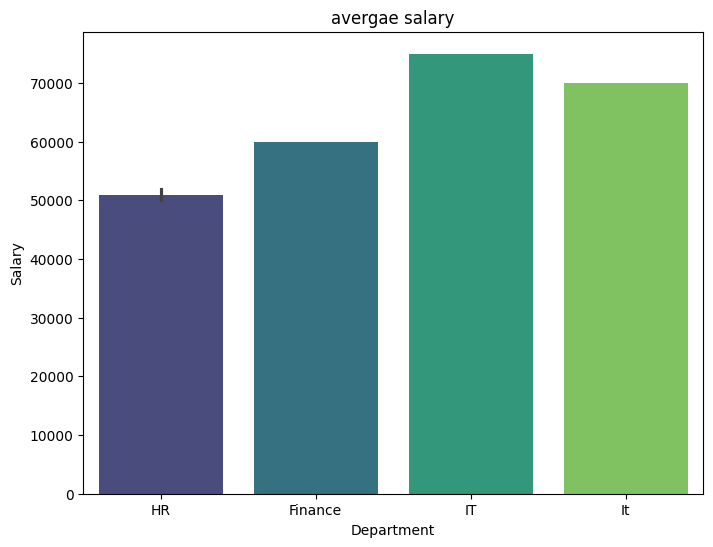

In [19]:
# =============================
# 4. Data Visualization
# =============================

plt.figure(figsize=(8,6))
sns.barplot(x = 'Department' , y = 'Salary', data = df , palette='viridis')
plt.title('avergae salary')
plt.show()


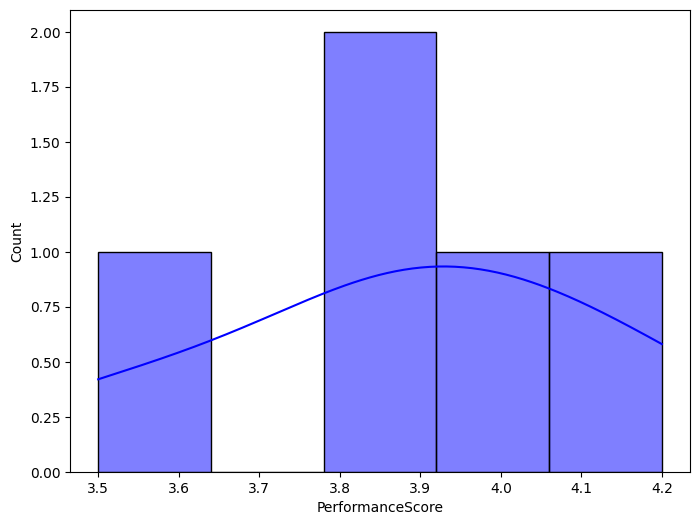

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(df['PerformanceScore'],kde = True, color='Blue', bins = 5)
plt.show()

In [21]:
# =============================
# 5. Advanced Analysis
# =============================

# Identify departments with above-average performance

mean_perf = df['PerformanceScore'].mean()
print(df[df['PerformanceScore'] > mean_perf])

   EmployeeID Department  Salary   HireDate  PerformanceScore  HireYear
1           2    Finance   60000 2019-11-11               4.2      2019
3           4         HR   52000 2021-03-01               4.0      2021
4           5         It   70000 2020-09-01               3.9      2020


In [28]:
# Question 1: Find the highest-paid employee.

query = "select  employeeid,salary from df where salary = (select max(salary) from df)"
print(psql.sqldf(query,locals()))

   EmployeeID  Salary
0           3   75000


In [29]:
# Question 2: Count employees in each department.
employee_count = df['Department'].value_counts()
print("\n# Employee count by department")
print(employee_count)




# Employee count by department
Department
HR         2
Finance    1
IT         1
It         1
Name: count, dtype: int64


In [30]:
# Question 3: Calculate the correlation between Salary and Performance Score.
correlation = df['Salary'].corr(df['PerformanceScore'])
print("\n# Correlation between Salary and Performance Score")
print(correlation)


# Correlation between Salary and Performance Score
0.16236485211462048
